<a href="https://colab.research.google.com/github/leksandre/-crab-for-web2ipr_book_shop/blob/main/process_yolo10b___BuildingCoverages_v8i_640px_coverage_building_detection_(v1_4_%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir /content/train
%cd /content/train
!mkdir /content/train/dataset
!mkdir /content/train/backup
!ls /content/train/dataset
!ls -lsaht /content/drive/MyDrive/datasets/

/content/train
total 1.4G
8.5M -rw------- 1 root root 8.5M Nov  1 05:50 BuildingCoverages.v8i.coco-segmentation.zip
138M -rw------- 1 root root 138M Oct 31 10:51 BuildingCoverages.v6i.coco-segmentation.zip
 512 -rw------- 1 root root  152 Oct  7 09:11 dynamic_reference_color.npy
 15M -rw------- 1 root root  15M Oct  7 08:57 front_trimmed_20251007_095029.png
 17M -rw------- 1 root root  17M Oct  7 08:57 back_trimmed_20251007_100652.png
 14M -rw------- 1 root root  14M Oct  6 11:04 front_trimmed_20251002_101416.png
 16M -rw------- 1 root root  16M Oct  6 11:04 front_trimmed_20250929_103100.png
 15M -rw------- 1 root root  15M Oct  6 11:04 front_trimmed_20250921_123516.png
 16M -rw------- 1 root root  16M Oct  6 11:04 front_trimmed_20250922_103157.png
 16M -rw------- 1 root root  16M Oct  6 11:04 front_trimmed_20250924_123727.png
 14M -rw------- 1 root root  14M Oct  6 11:04 front_trimmed_20250908_113101.png
 14M -rw------- 1 root root  14M Oct  6 11:04 front_trimmed_20250908_113117.png
 

In [4]:
import glob

In [5]:
arch_01 = glob.glob('/content/drive/MyDrive/datasets/BuildingCoverages.v8i.coco-segmentation.zip')[0]

In [6]:
print(arch_01)

/content/drive/MyDrive/datasets/BuildingCoverages.v8i.coco-segmentation.zip


In [7]:
myvar = "/content/train/"
!cd {myvar}

In [8]:
!cp {arch_01} "/content/train/"

In [9]:
import os
import os.path

In [10]:

if not os.path.exists("/content/train/dataset/README.dataset.txt"):
 if os.path.exists(arch_01) or os.path.isfile(arch_01):
  if os.path.isfile(arch_01):
    !unrar x -Y {arch_01} "/content/train/dataset"
    !unzip {arch_01} -d "/content/train/dataset"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

/content/drive/MyDrive/datasets/BuildingCoverages.v8i.coco-segmentation.zip is not RAR archive
No files to extract
Archive:  /content/drive/MyDrive/datasets/BuildingCoverages.v8i.coco-segmentation.zip
  inflating: /content/train/dataset/README.dataset.txt  
  inflating: /content/train/dataset/README.roboflow.txt  
   creating: /content/train/dataset/test/
 extracting: /content/train/dataset/test/IMG_20251026_150835_jpg.rf.af9912d1f444ae3476fa57f96c3ab718.jpg  
  inflating: /content/train/dataset/test/_annotations.coco.json  
 extracting: /content/train/dataset/test/back_20250929_105857_jpg.rf.26f833aefb474a03a13f26132f370279.jpg  
 extracting: /content/train/dataset/test/back_trimmed_20250901_105338_png.rf.95ed39506716dbdc2ff9585f2e7aefaf.jpg  
 extracting: /content/train/dataset/test/back_trimmed_20250901_105659_png.rf.c7f51327d72a3c839c4eba997f9cfd9a.jpg  
 extracting: /content/train/dataset/test/back_trimmed_

In [11]:
TRAIN_IMAGE_PATH = '/content/train/dataset/train/'
TEST_IMAGE_PATH = '/content/train/dataset/test/'
VAL_IMAGE_PATH = '/content/train/dataset/valid/'

In [12]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
snehilsanyal_construction_site_safety_image_dataset_roboflow_path = kagglehub.dataset_download('snehilsanyal/construction-site-safety-image-dataset-roboflow')

print('Data source import complete.')


100%|██████████| 206M/206M [00:01<00:00, 109MB/s]

Extracting files...


Data source import complete.


# About

- In this notebook I will train Yolo v9 model to detect PPE (Personal Protective Equipment), using [this existing dataset](https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow) from [Roboflow](https://universe.roboflow.com/)
- In the [next notebook](https://www.kaggle.com/hinepo/yolov9-inference-for-red-zone-application) I will use this custom model to make inference on videos and post-process the results so they can be used in a Red Zone/Trespassing detection application
- This notebook is a generic training pipeline that you can use to train any Yolo model for object detection task on any dataset (images/number of classes), as long as you provide the dataset in the correct folder structure accepted by Yolo and the annotations/labels in Yolo format
- [Ultralytics - docs](https://docs.ultralytics.com/)
- [Ultralytics - github](https://github.com/ultralytics/ultralytics)

___

[CSS (Construction Site Safety) Dataset](https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow):

- Labels in this dataset:
    - 0: Window


- More info:
    - Number of classes: 10
    - Label Annotation: YOLO format (.txt)
      - `[class_id, center_x, center_y, width, height]`
      
___      

Yolo Dataset folder structure: the paths to these folders will be written to a YAML file that will be used by Yolo.

```
Custom dataset directory (root)
    - train
        - images (folder including all training images)
        - labels (folder including all training labels)
    - validation
        - images (folder including all validation images)
        - labels (folder including all validation labels)
    - test
        - images (folder including all test images)
        - labels (folder including all test labels)

```

**<font color='orange'>If you like this notebook, don't forget to show your support with your upvote!</font>**

In [13]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ea199cfa-a511-6e6d-6d83-0d8b29368f46)


# Installs/Imports

In [14]:
%%time

! pip install --upgrade ultralytics -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
CPU times: user 1.58 s, sys: 253 ms, total: 1.83 s
Wall time: 8.17 s


In [15]:
import ultralytics
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.234


In [16]:
import warnings
warnings.filterwarnings("ignore")

import os
import re
import glob
import random
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

import IPython.display as display
from PIL import Image
import cv2

from ultralytics import YOLO

In [17]:
! wandb disabled

W&B disabled.


# CFG

- CFG class enables easy and organized experimentation
- Set `DEBUG = True` to make quick experiments

In [18]:
class CFG:
    DEBUG = False
    FRACTION = 0.05 if DEBUG else 1.0
    SEED = 88

    # classes
    CLASSES = [
        "BUILDING",
        "cG_s1",
        "c_s1",
        "cr",
        "iZ_s2",
        "i_s2",
        "mG_s1",
        "m_s1",
        "pG_s3",
        "p_s3"
    ]
    NUM_CLASSES_TO_TRAIN = len(CLASSES)

    # training
    EPOCHS = 3 if DEBUG else 100 # 100
    BATCH_SIZE = 16

    BASE_MODEL = 'yolov10b'  # yolov10n, yolov10s, yolov10m, yolov10b, yolov10x, yolov10l

    BASE_MODEL_WEIGHTS = f'{BASE_MODEL}.pt'
    EXP_NAME = f'ppe_css_{EPOCHS}_epochs'

    OPTIMIZER = 'auto' # SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto
    LR = 1e-3
    LR_FACTOR = 0.01
    WEIGHT_DECAY = 5e-4
    DROPOUT = 0.0
    PATIENCE = 20
    PROFILE = False
    LABEL_SMOOTHING = 0.0

    # paths
    CUSTOM_DATASET_DIR = '/content/train/dataset/'
    OUTPUT_DIR = './'

# Create YAML file

- Create ```data.yaml``` file properly formatted to be used by Yolo

In [19]:
dict_file = {
    'train': os.path.join(CFG.CUSTOM_DATASET_DIR, 'train'),
    'val': os.path.join(CFG.CUSTOM_DATASET_DIR, 'valid'),
    'test': os.path.join(CFG.CUSTOM_DATASET_DIR, 'test'),
    'nc': CFG.NUM_CLASSES_TO_TRAIN,
    'names': CFG.CLASSES
    }

with open(os.path.join(CFG.OUTPUT_DIR, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [20]:
### read yaml file created
def read_yaml_file(file_path = CFG.CUSTOM_DATASET_DIR):
    with open(file_path, 'r') as file:
        try:
            data = yaml.safe_load(file)
            return data
        except yaml.YAMLError as e:
            print("Error reading YAML:", e)
            return None

### print it with newlines
def print_yaml_data(data):
    formatted_yaml = yaml.dump(data, default_style=False)
    print(formatted_yaml)

file_path = os.path.join(CFG.OUTPUT_DIR, 'data.yaml')
yaml_data = read_yaml_file(file_path)

if yaml_data:
    print_yaml_data(yaml_data)

names:
- BUILDING
- cG_s1
- c_s1
- cr
- iZ_s2
- i_s2
- mG_s1
- m_s1
- pG_s3
- p_s3
nc: 10
test: /content/train/dataset/test
train: /content/train/dataset/train
val: /content/train/dataset/valid



# Dataset

- Check some images
- Image utils

## Visualize one image

In [21]:
def display_image(image, print_info = True, hide_axis = False):
    if isinstance(image, str):  # Check if it's a file path
        img = Image.open(image)
        plt.imshow(img)
    elif isinstance(image, np.ndarray):  # Check if it's a NumPy array
        image = image[..., ::-1]  # BGR to RGB
        img = Image.fromarray(image)
        plt.imshow(img)
    else:
        raise ValueError("Unsupported image format")

    if print_info:
        print('Type: ', type(img), '\n')
        print('Shape: ', np.array(img).shape, '\n')

    if hide_axis:
        plt.axis('off')

    plt.show()

In [22]:
folder_path1 = CFG.CUSTOM_DATASET_DIR + 'train/'

Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'> 

Shape:  (640, 640, 3) 



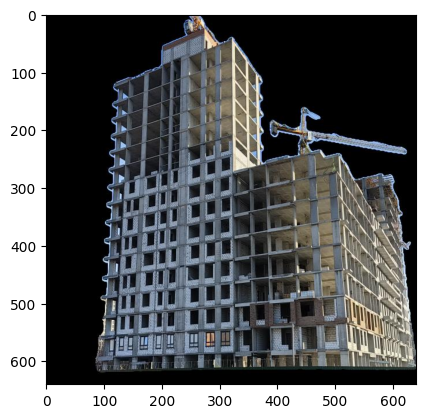

In [23]:
example_image_path =  glob.glob(folder_path1+'/*.jpg')[0]
display_image(example_image_path, print_info = True, hide_axis = False)

## Visualize many images

In [24]:
def plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED):

    random.seed(seed)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]

    # Ensure that we have at least num_images files to choose from
    if len(image_files) < num_images:
        raise ValueError("Not enough images in the folder")

    # Randomly select num_images image files
    selected_files = random.sample(image_files, num_images)

    # Create a subplot grid
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    for i, file_name in enumerate(selected_files):
        # Open and display the image using PIL
        img = Image.open(os.path.join(folder_path, file_name))

        if num_rows == 1:
            ax = axes[i % num_cols]
        else:
            ax = axes[i // num_cols, i % num_cols]

        ax.imshow(img)
        ax.axis('off')
        # ax.set_title(file_name)

    # Remove empty subplots
    for i in range(num_images, num_rows * num_cols):
        if num_rows == 1:
            fig.delaxes(axes[i % num_cols])
        else:
            fig.delaxes(axes[i // num_cols, i % num_cols])

    plt.tight_layout()
    plt.show()

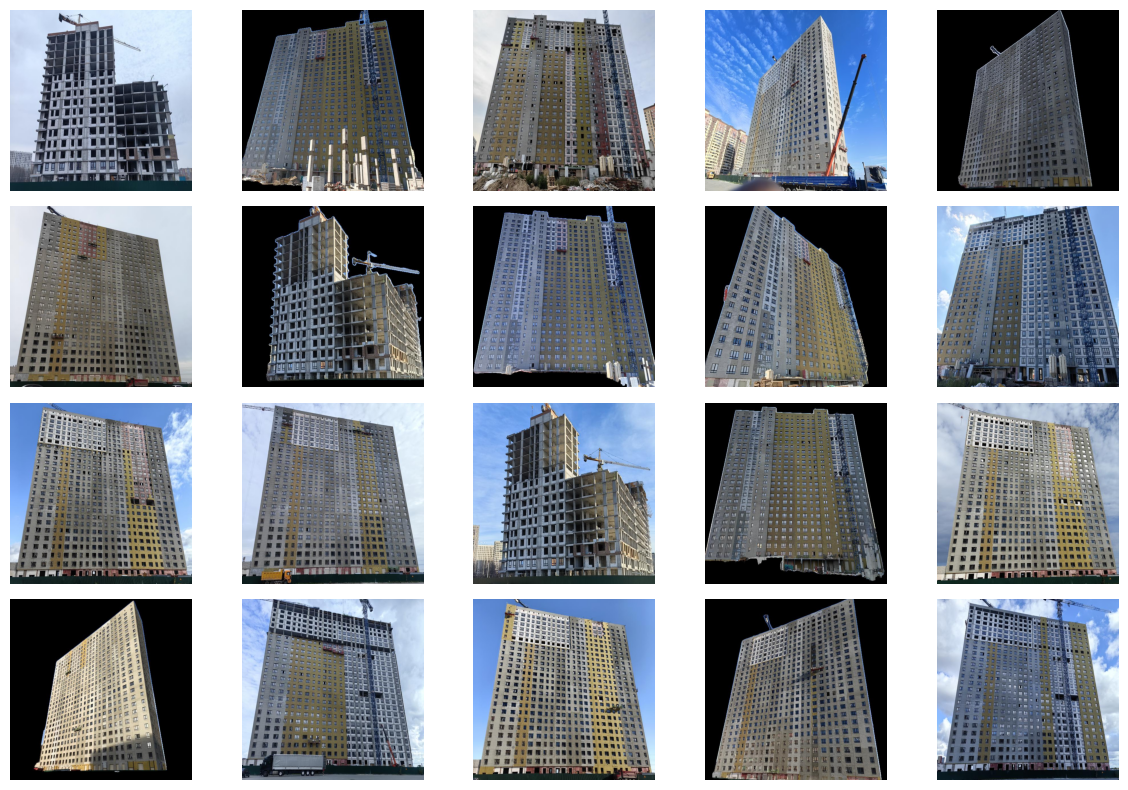

In [25]:
folder_path = CFG.CUSTOM_DATASET_DIR + 'train/'
plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED)
# plot_random_images_from_folder(folder_path, num_images=20, seed=54)

## Image properties

In [26]:
def get_image_properties(image_path):
    # Read the image file
    img = cv2.imread(image_path)

    # Check if the image file is read successfully
    if img is None:
        raise ValueError("Could not read image file")

    # Get image properties
    properties = {
        "width": img.shape[1],
        "height": img.shape[0],
        "channels": img.shape[2] if len(img.shape) == 3 else 1,
        "dtype": img.dtype,
    }

    return properties

In [27]:
print(example_image_path)

/content/train/dataset/train/obj1_trimmed_20251026_151455_png.rf.5c49de6765e3a7024d9ab8cdffa8f916.jpg


In [28]:
img_properties = get_image_properties(example_image_path)
img_properties

{'width': 640, 'height': 640, 'channels': 3, 'dtype': dtype('uint8')}

## Dataset statistics

In [29]:
import json
import os
import pandas as pd

# %%time
class_idx = {str(i): CFG.CLASSES[i] for i in range(CFG.NUM_CLASSES_TO_TRAIN)}

class_stat = {}
data_len = {}
class_info = []


# Путь к вашим COCO-файлам
coco_files = {
    'train': os.path.join(CFG.CUSTOM_DATASET_DIR, 'train/_annotations.coco.json'),
    'valid': os.path.join(CFG.CUSTOM_DATASET_DIR, 'valid/_annotations.coco.json'),
    'test':  os.path.join(CFG.CUSTOM_DATASET_DIR, 'test/_annotations.coco.json')
}

# Сначала построим mapping из category_id -> class_name
# Предположим, что categories в JSON уже соответствуют вашим классам
with open(coco_files['train'], 'r') as f:
    sample_coco = json.load(f)

# Создаём маппинг: category_id → class_name
id_to_class = {cat['id']: cat['name'] for cat in sample_coco['categories']}
print(set(id_to_class.values()))
print(set(CFG.CLASSES))
# Убедимся, что все классы из CFG.CLASSES присутствуют
assert set(id_to_class.values()) == set(CFG.CLASSES), "Mismatch between COCO categories and CFG.CLASSES"

class_info = []

for mode, json_path in coco_files.items():
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Считаем количество изображений
    num_images = len(data['images'])

    # Инициализируем счётчики по классам
    class_count = {cls: 0 for cls in CFG.CLASSES}

    # Подсчитываем аннотации
    for ann in data['annotations']:
        class_name = id_to_class[ann['category_id']]
        class_count[class_name] += 1

    class_info.append({'Mode': mode, **class_count, 'Data_Volume': num_images})

dataset_stats_df = pd.DataFrame(class_info)
dataset_stats_df

{'iZ_s2', 'p_s3', 'BUILDING', 'pG_s3', 'mG_s1', 'm_s1', 'c_s1', 'cr', 'i_s2', 'cG_s1'}
{'iZ_s2', 'p_s3', 'BUILDING', 'pG_s3', 'mG_s1', 'm_s1', 'c_s1', 'cr', 'i_s2', 'cG_s1'}


,Mode,BUILDING,cG_s1,c_s1,cr,iZ_s2,i_s2,mG_s1,m_s1,pG_s3,p_s3,Data_Volume
0,train,0,3,10,27,27,205,27,169,22,136,65
1,valid,0,4,14,15,0,68,12,64,3,28,21
2,test,0,2,4,5,2,64,11,36,2,28,14


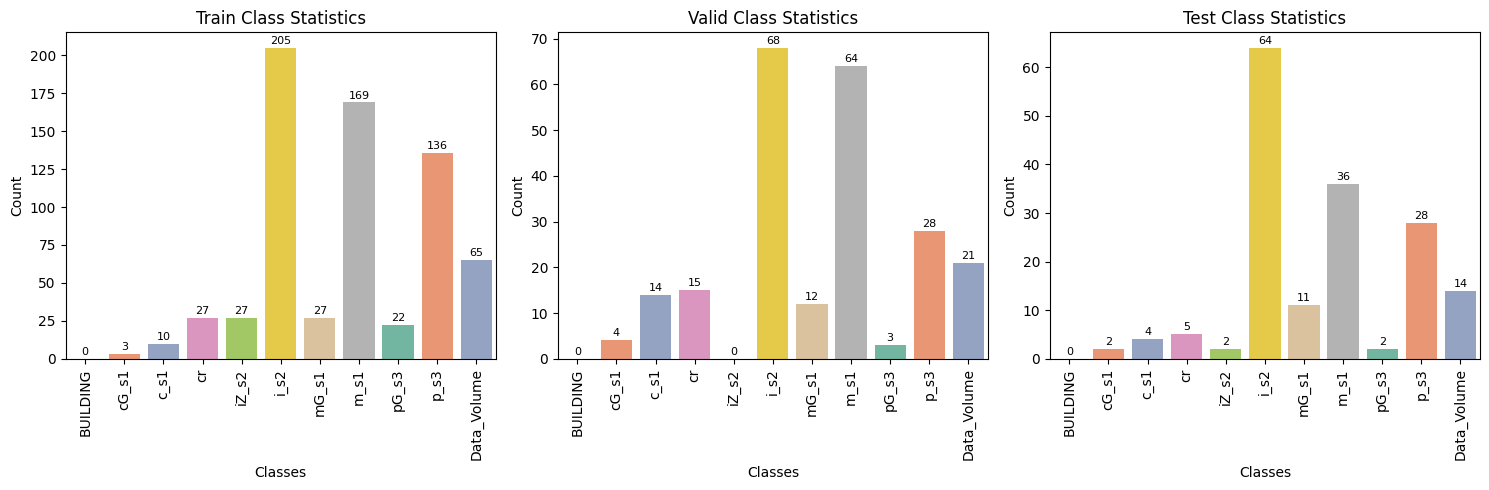

In [30]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot vertical bar plots for each mode in subplots
for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(
        data=dataset_stats_df[dataset_stats_df['Mode'] == mode].drop(columns='Mode'),
        orient='v',
        ax=axes[i],
        palette='Set2'
    )

    axes[i].set_title(f'{mode.capitalize()} Class Statistics')
    axes[i].set_xlabel('Classes')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

    # Add annotations on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

## Image sizes

In [31]:
%%time

for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:')

    img_size = 0
    for file in glob.glob(os.path.join(CFG.CUSTOM_DATASET_DIR, mode, 'images', '*')):

        image = Image.open(file)

        if image.size != img_size:
            print(f'{image.size}')
            img_size = image.size
            print('\n')


Image sizes in train set:

Image sizes in valid set:

Image sizes in test set:
CPU times: user 799 µs, sys: 0 ns, total: 799 µs
Wall time: 844 µs


# Base Model Inference

- Just checking the power of the pretrained model inference on the CSS dataset

In [32]:
import torch
print(torch.version.cuda)

12.6


In [33]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Указывает на первый GPU

In [34]:
# Проверка доступности GPU
print(f"GPU доступен: {torch.cuda.is_available()}")
print(f"Количество GPU: {torch.cuda.device_count()}")

GPU доступен: True
Количество GPU: 1


In [35]:
# !mkdir -p {HOME}/weights
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
# !wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
# !ls -lh {HOME}/weights

In [36]:
# CFG.BASE_MODEL_WEIGHTS = 'yolov10b.pt' # yolov10n.pt, yolov10s.pt, yolov10m.pt, yolov10b.pt, yolov10x.pt, yolov10l.pt
# CFG.BATCH_SIZE =8
# (img_properties['height'], img_properties['width']) = (640,640) #    imgsz=640,        # ← критически важно!

In [37]:
CFG.BASE_MODEL_WEIGHTS

'yolov10b.pt'

In [38]:
model = YOLO(CFG.BASE_MODEL_WEIGHTS)

In [39]:


results = model.predict(
    source = example_image_path,

    classes = [0],
    conf = 0.30,
    device = 0, # inference with dual GPU
    imgsz = (img_properties['height'], img_properties['width']),

    save = True,
    save_txt = True,
    save_conf = True,
    exist_ok = True,
)


image 1/1 /content/train/dataset/train/obj1_trimmed_20251026_151455_png.rf.5c49de6765e3a7024d9ab8cdffa8f916.jpg: 640x640 (no detections), 42.4ms
Speed: 5.3ms preprocess, 42.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/train/runs/detect/predict
0 label saved to /content/train/runs/detect/predict/labels


In [40]:
### check predictions with base model
example_image_inference_output = example_image_path.split('/')[-1]
print(example_image_inference_output)


obj1_trimmed_20251026_151455_png.rf.5c49de6765e3a7024d9ab8cdffa8f916.jpg


Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'> 

Shape:  (640, 640, 3) 



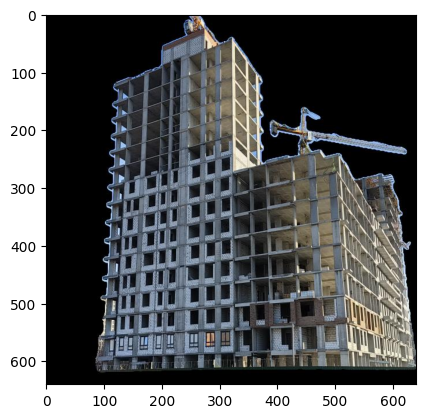

In [41]:
display_image(f'/content/train/dataset/train/{example_image_inference_output}')

# Train

[Arguments for training](https://docs.ultralytics.com/modes/train/#arguments)

In [42]:
print('Model: ', CFG.BASE_MODEL_WEIGHTS)
print('Epochs: ', CFG.EPOCHS)
print('Batch: ', CFG.BATCH_SIZE)

Model:  yolov10b.pt
Epochs:  100
Batch:  16


In [43]:
### Load pre-trained YOLO model
# model = YOLO(CFG.BASE_MODEL_WEIGHTS)

In [44]:
# !cp /content/drive/MyDrive/datasets/windowsYolo9_v1.pt /content/train/

In [46]:
def thread_1_bk(fileNameWithPath,fileLabelPath,file_id,file_name,annotations,categories,all_images):
    # if os.path.isfile(fileLabelPath):
    #   return False
    # time.sleep(1)s
    filtered_list = list(filter(lambda x: x["image_id"] == file_id, annotations))
    image = cv2.imread(fileNameWithPath)
    img_height = image.shape[0]
    img_width = image.shape[1]
    # print(filtered_list)
    # print('step1')
    # print('height',img_height)
    # print('width',img_width)
    label_file = open(fileLabelPath, 'a')
    for annotation in filtered_list:
      if 1:
          # print('step2')
      # if image.shape[1] >= 300:
          filtered_cats = list(filter(lambda x: x["id"] == annotation['category_id'], categories))
          # print('step3')
          filtered_cat = filtered_cats[0]
          # print('step4')
          obj_class = str(filtered_cat['name'])
          class_id = annotation['category_id']
          # print('step5')
          x1 = float(annotation['bbox'][0])#x
          # print('step6')
          y1 = float(annotation['bbox'][1])#y
          # print('step7')
          box_width = float(annotation['bbox'][2])#width
          # print('step8')
          box_height = float(annotation['bbox'][3])#height
          # print('step9')

    # if bbox[0] < 0:
    #   left = 0
    # else:
    #   left = bbox[0]
    # if bbox[1] < 0:
    #   top = 0
    # else:
    #   top = bbox[1]
    # if bbox[2] < 0:
    #   right = 1
    # else:
    #   right = bbox[2]
    # if bbox[3] < 0:
    #   bottom = 1
    # else:
    #   bottom = bbox[3]
    # надо указывать все классы

          x_center_coco = x1 + float(box_width/2)
          y_center_coco = y1 + float(box_height/2)
          x_center = str(round(x_center_coco / img_width,4))
          y_center = str(round(y_center_coco / img_height,4))
          obj_width = str(round(box_width / img_width,4))
          obj_height = str(round(box_height / img_height,4))
          # content1 = obj_class + ' ' + x_center + ' ' + y_center + ' ' + obj_width + ' ' + obj_height
          content1 = f"{class_id} {x_center} {y_center} {obj_width} {obj_height}"
          # all_images[file_name].append(content1)
          label_file.write(content1 + '\n')
    label_file.close()
    # print(fileLabelPath)

In [47]:
def procStupidMocsYoloStruk_bk(struck):
  all_images = {}
  annotations = struck['annotations']
  images = struck['images']
  categories = struck['categories']
  # print('annotations',annotations)
  # print('categories',categories)
  # print('images',images)
  threads = []
  for image in images:
    file_name = image['file_name']
    # if file_name != '0000001.jpg':
    #   continue
    # print(file_name)
    file_id = image['id']
    all_images[file_name] = []
    fileNameWithPath = TRAIN_IMAGE_PATH + file_name
    check_file = os.path.isfile(fileNameWithPath)

    if not check_file:
      fileNameWithPath = TEST_IMAGE_PATH + file_name
      check_file = os.path.isfile(fileNameWithPath)

    if not check_file:
      fileNameWithPath = VAL_IMAGE_PATH + file_name
      check_file = os.path.isfile(fileNameWithPath)

    if not check_file:
      print('file not exist ',file_name)
      continue

    fileLabelPath = fileNameWithPath[:-4] + '.txt'
    check_file = os.path.isfile(fileLabelPath)

    label_file = open(fileLabelPath, 'w')
    label_file.close()

    # if not check_file:
    #   label_file = open(fileLabelPath, 'w')
    #   label_file.close()
    # else:
    #   pass
    #   # print('annotations already exist ',file_name) #fileLabelPath
    #   # continue



    while threading.active_count()>maxactivethreads:  # countAll > 19 or and # countAll = 0
        if random.randint(1,10)==9:
         print('threading.active_count() process ',threading.active_count())
        time.sleep(2)


    if random.randint(1,300)==9:
        print('threading.active_count() process ',threading.active_count())

    # annotations2 = annotationsю.copy()
    thread = threading.Thread(target=thread_1, args=(fileNameWithPath,fileLabelPath,file_id,file_name,annotations,categories,all_images))
    thread.daemon = True
    thread.start()
    threads.append(thread)

  for t in threads:
      t.join()

  return len(images)

In [59]:
import os
import cv2
import json
import threading
import time
import random
from concurrent.futures import ThreadPoolExecutor # Альтернатива ручным потокам

# --- Глобальные переменные (предполагаются определенными где-то в вашем скрипте) ---
# TRAIN_IMAGE_PATH = ...
# TEST_IMAGE_PATH = ...
# VAL_IMAGE_PATH = ...
# maxactivethreads = 150

def thread_1(fileNameWithPath, fileLabelPath, file_id, file_name, annotations, categories, all_images):
    """
    Обрабатывает одно изображение: находит его аннотации (сегментации) в COCO,
    нормализует координаты и записывает в формат YOLO-segment.
    """
    # Фильтруем аннотации для текущего изображения (image_id)
    filtered_annotations = [ann for ann in annotations if ann["image_id"] == file_id]

    # Загружаем изображение, чтобы получить его размеры
    image = cv2.imread(fileNameWithPath)
    if image is None:
        print(f"Ошибка: Не удалось загрузить изображение {fileNameWithPath}")
        return
    img_height, img_width = image.shape[:2]

    # Открываем файл разметки для записи
    with open(fileLabelPath, 'a') as label_file: # Используем 'a', так как файл уже создан
        for annotation in filtered_annotations:
            category_id = annotation["category_id"]

            # --- ОСНОВНОЕ ИЗМЕНЕНИЕ: Обработка 'segmentation' ---
            segmentation_data = annotation.get("segmentation", [])

            # Проверяем формат segmentation
            if not segmentation_data:
                print(f"Предупреждение: У аннотации {annotation['id']} для изображения {file_name} нет данных сегментации. Пропущено.")
                continue

            # segmentation_data может быть:
            # 1. Список списков (Polygon): [ [x1, y1, x2, y2, ...], [x1, y1, ...] ] - несколько контуров для одного объекта
            # 2. Объект (RLE): { "counts": [...], "size": [...] }

            # Мы обрабатываем только Polygon формат
            if isinstance(segmentation_data, list) and len(segmentation_data) > 0 and isinstance(segmentation_data[0], (list, tuple)):
                # Это Polygon формат
                for contour in segmentation_data: # Обычно один контур, но может быть несколько
                    if len(contour) < 6: # Полигон должен иметь минимум 3 точки (6 координат)
                        print(f"Предупреждение: У аннотации {annotation['id']} слишком мало точек в сегментации (< 6). Пропущено.")
                        continue

                    # Нормализуем координаты для текущего контура
                    normalized_coords = []
                    for i in range(0, len(contour), 2): # Итерируемся по парам (x, y)
                        x_abs = contour[i]
                        y_abs = contour[i+1]
                        x_norm = x_abs / img_width
                        y_norm = y_abs / img_height
                        # Округляем до 6 знаков после запятой, как часто делается в YOLO
                        normalized_coords.extend([round(x_norm, 6), round(y_norm, 6)])

                    # Формируем строку для записи
                    # Формат: <class_id> <x1_norm> <y1_norm> <x2_norm> <y2_norm> ... <xn_norm> <yn_norm>
                    content1 = f"{category_id} " + " ".join(map(str, normalized_coords))
                    label_file.write(content1 + '\n')

            elif isinstance(segmentation_data, dict):
                # Это RLE формат - ultralytics может не всегда его корректно обрабатывать при обучении.
                # Лучше преобразовать RLE в Polygon перед сохранением, но это требует дополнительной логики (cv2, pycocotools).
                # Для простоты, пока что выведем предупреждение.
                print(f"Предупреждение: Обнаружена RLE-сегментация для аннотации {annotation['id']} в {file_name}. RLE может вызвать ошибки при обучении. Рассмотрите преобразование в Polygon. Пропущено.")
                continue # Пропускаем эту аннотацию
            else:
                print(f"Предупреждение: Неизвестный формат сегментации для аннотации {annotation['id']} в {file_name}: {type(segmentation_data)}. Пропущено.")
                continue
    # label_file закрывается автоматически при выходе из 'with'


def procStupidMocsYoloStruk(struck):
  """
  Обрабатывает COCO JSON (с сегментацией) и создает файлы разметки YOLO-segment (.txt).
  """
  all_images = {}
  annotations = struck['annotations']
  images = struck['images']
  categories = struck['categories']
  # print('annotations',annotations)
  # print('categories',categories)
  # print('images',images)

  # --- Используем ThreadPoolExecutor для управления потоками ---
  max_workers = min(32, len(images) + 4) # Стандартный способ выбора числа потоков
  # max_workers = maxactivethreads # Или используйте ваше ограничение, если оно строгое

  with ThreadPoolExecutor(max_workers=max_workers) as executor:
      futures = []
      for image in images:
          file_name = image['file_name']
          # if file_name != '0000001.jpg':
          #   continue
          # print(file_name)
          file_id = image['id']
          all_images[file_name] = []
          fileNameWithPath = TRAIN_IMAGE_PATH + file_name
          check_file = os.path.isfile(fileNameWithPath)

          if not check_file:
            fileNameWithPath = TEST_IMAGE_PATH + file_name
            check_file = os.path.isfile(fileNameWithPath)

          if not check_file:
            fileNameWithPath = VAL_IMAGE_PATH + file_name
            check_file = os.path.isfile(fileNameWithPath)

          if not check_file:
            print('file not exist ',file_name)
            continue # Пропускаем, если файл не найден

          fileLabelPath = fileNameWithPath[:-4] + '.txt'

          # Создаем пустой .txt файл или очищаем существующий перед записью
          open(fileLabelPath, 'w').close()

          # Отправляем задачу в пул потоков
          future = executor.submit(thread_1, fileNameWithPath, fileLabelPath, file_id, file_name, annotations, categories, all_images)
          futures.append(future)

      # Ждем завершения всех задач
      for future in futures:
          future.result() # result() блокирует выполнение, пока задача не завершится; исключение, если произошло, будет поднято здесь

  return len(images)

# --- Пример использования (псевдокод) ---
# train_label = json.load(open('/path/to/your/train_annotations.json', 'r'))
# val_label = json.load(open('/path/to/your/val_annotations.json', 'r'))
# test_label = json.load(open('/path/to/your/test_annotations.json', 'r')) # Если есть

# train_count = procStupidMocsYoloStruk(train_label)
# val_count = procStupidMocsYoloStruk(val_label)
# test_count = procStupidMocsYoloStruk(test_label) # Если есть

# print(f"Обработано {train_count} тренировочных изображений")
# print(f"Обработано {val_count} валидационных изображений")
# print(f"Обработано {test_count} тестовых изображений") # Если есть

In [60]:
maxactivethreads = 150

In [61]:
cars_make_model_label = open(os.path.join(CFG.CUSTOM_DATASET_DIR, 'train', '_annotations.coco.json'), 'r')
train_label = json.load(cars_make_model_label)

In [62]:
print(train_label)

{'info': {'year': '2025', 'version': '8', 'description': 'Exported from roboflow.com', 'contributor': '', 'url': 'https://public.roboflow.com/object-detection/undefined', 'date_created': '2025-11-01T05:50:48+00:00'}, 'licenses': [{'id': 1, 'url': 'https://creativecommons.org/licenses/by/4.0/', 'name': 'CC BY 4.0'}], 'categories': [{'id': 0, 'name': 'BUILDING', 'supercategory': 'none'}, {'id': 1, 'name': 'cG_s1', 'supercategory': 'BUILDING'}, {'id': 2, 'name': 'c_s1', 'supercategory': 'BUILDING'}, {'id': 3, 'name': 'cr', 'supercategory': 'BUILDING'}, {'id': 4, 'name': 'iZ_s2', 'supercategory': 'BUILDING'}, {'id': 5, 'name': 'i_s2', 'supercategory': 'BUILDING'}, {'id': 6, 'name': 'mG_s1', 'supercategory': 'BUILDING'}, {'id': 7, 'name': 'm_s1', 'supercategory': 'BUILDING'}, {'id': 8, 'name': 'pG_s3', 'supercategory': 'BUILDING'}, {'id': 9, 'name': 'p_s3', 'supercategory': 'BUILDING'}], 'images': [{'id': 0, 'license': 1, 'file_name': 'front_20251010_125751_jpg.rf.e984726fc8a7f08234fd834087

In [63]:
len(train_label['images'])

65

In [64]:
cars_make_model_label = open(os.path.join(CFG.CUSTOM_DATASET_DIR, 'valid', '_annotations.coco.json'), 'r')
val_label = json.load(cars_make_model_label)

In [65]:
len(val_label['images'])

21

In [66]:
cars_make_model_label = open(os.path.join(CFG.CUSTOM_DATASET_DIR, 'test', '_annotations.coco.json'), 'r')
test_label = json.load(cars_make_model_label)

In [67]:
len(test_label['images'])

14

In [68]:
import json
import cv2
import os.path
import time
import threading
from threading import *
import time
import random

In [69]:
trainStuk = procStupidMocsYoloStruk(train_label)

In [70]:
print(trainStuk)

65


In [71]:
testStuk = procStupidMocsYoloStruk(test_label)

In [72]:
print(testStuk)

14


In [73]:
valStuk = procStupidMocsYoloStruk(val_label)

In [74]:
print(valStuk)

21


In [75]:
# model = YOLO('windowsYolo9_v1.pt')

In [76]:
%%time

### train
model.train(
    data = os.path.join(CFG.OUTPUT_DIR, 'data.yaml'),
    task='segment',
    # task = 'detect',

    imgsz = (img_properties['height'], img_properties['width']), #    imgsz=640,        # ← критически важно!

    epochs = CFG.EPOCHS,
    batch = CFG.BATCH_SIZE,

    # workers=2,        # уменьшите, если не хватает RAM
    cache=False,

    optimizer = CFG.OPTIMIZER,
    lr0 = CFG.LR,
    lrf = CFG.LR_FACTOR,
    weight_decay = CFG.WEIGHT_DECAY,
    dropout = CFG.DROPOUT,
    fraction = CFG.FRACTION,
    patience = CFG.PATIENCE,
    profile = CFG.PROFILE,
    label_smoothing = CFG.LABEL_SMOOTHING,

    name = f'{CFG.BASE_MODEL}_{CFG.EXP_NAME}',
    seed = CFG.SEED,

    val = True,
    amp = True,
    exist_ok = True,
    resume = False,
    device = 0, #[0,1]
    verbose = False,
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in the future.
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=(640, 640), int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10b.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov10b_ppe_css_100_epochs, nbs=64, nms=False, opset=None, optimize=Fa

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ce87c1efa40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

# Export

- [Export mode](https://docs.ultralytics.com/modes/export/) is used for exporting a YOLOv9 model to a format that can be used for deployment. In this mode, the model is converted to a format that can be used by other software applications or hardware devices. This mode is useful when deploying the model to production environments.

In [77]:
img_properties

{'width': 640, 'height': 640, 'channels': 3, 'dtype': dtype('uint8')}

In [80]:
# Export the model
# model.export(
#     format = 'onnx', # openvino, onnx, engine, tflite
#     imgsz = (img_properties['height'], img_properties['width']),
#     half = False,
#     int8 = False,
#     simplify = False,
#     nms = False,
# )

# model.export(
#     format='onnx',
#     imgsz=(img_properties['height'], img_properties['width']),
#     half=False,
#     int8=False,
#     simplify=True, # <-- Попробуйте включить
#     nms=False,
# )

model.export(
    format='openvino',
    imgsz=(img_properties['height'], img_properties['width']),
    half=False, # Обычно не используется с openvino
    int8=False, # Квантование выполняется отдельно
    simplify=True, # Может помочь
    nms=False, # NMS обычно добавляется при инференсе
)


Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv10b summary (fused): 142 layers, 19,011,822 parameters, 0 gradients, 91.7 GFLOPs

PyTorch: starting from '/content/train/runs/segment/yolov10b_ppe_css_100_epochs/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (39.6 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 4 packages in 179ms
Prepared 2 packages in 753ms
Installed 2 packages in 21ms
 + openvino==2025.4.0
 + openvino-telemetry==2025.2.0

requirements: AutoUpdate success ✅ 1.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2025.4.0-20398-7a975177ff4-releases/2025/4...
OpenVINO: export success ✅ 16.8s, saved as '/content/train/runs/segment/yolov10b_ppe_css_100_epochs/weights/best_openvino_model/' (73.0 MB)

Export complet

'/content/train/runs/segment/yolov10b_ppe_css_100_epochs/weights/best_openvino_model'

# Train results

In [81]:
results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'batch' not in i
]

results_paths

[]

In [82]:
for file in sorted(results_paths):
    print(file)
    display_image(file, print_info = False, hide_axis = True)
    print('\n')

# Loss

- The loss function in YOLO consists of three main components: box loss, class loss (cls loss), and objectness loss (dfl loss).
- The total loss in YOLO is a combination of these three components

___

**Box loss:**
- The box loss measures how accurately the predicted bounding box coordinates match the ground truth bounding box.
- Is typically computed using a regression loss, such as Mean Squared Error (MSE), between the predicted bounding box coordinates (center coordinates, width, and height) and the ground truth bounding box coordinates.

___

**Class loss (cls):**
- The class loss measures how well the predicted class probabilities match the true class labels.
- The class loss is usually computed using a categorical cross-entropy loss, which penalizes the difference between the predicted class probabilities and the true class labels.

___

**Objectness loss (dfl):**
- Distribution Focal Loss
- YOLO predicts an "objectness" score for each bounding box, indicating the presence of an object within the grid cell. This score helps filter out irrelevant bounding boxes.
- The objectness loss is calculated based on the difference between the predicted objectness score and the ground truth objectness label. It penalizes the model for false positives and false negatives in predicting the presence of an object.

In [85]:
df = pd.read_csv(f'{CFG.OUTPUT_DIR}runs/segment/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/results.csv')
df = df.rename(columns=lambda x: x.replace(" ", ""))
df.to_csv(f'{CFG.OUTPUT_DIR}training_log_df.csv', index=False)
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,26.2595,7.40505,9.79166,7.36539,0.01084,0.01261,0.00608,0.00070,8.54818,8.27412,8.06480,0.000029,0.000029,0.000029
1,2,31.4151,7.56713,9.79230,7.33014,0.00000,0.00000,0.00000,0.00000,8.49869,8.29841,8.05965,0.000064,0.000064,0.000064
2,3,36.9926,7.43243,9.73224,7.30924,0.00000,0.00000,0.00000,0.00000,8.63083,8.24722,8.14785,0.000098,0.000098,0.000098
3,4,42.3185,7.02485,9.81918,7.07967,0.00229,0.01339,0.00127,0.00034,8.66247,8.23873,8.16871,0.000132,0.000132,0.000132
4,5,47.1835,6.80856,9.30081,6.88629,0.00174,0.01786,0.00104,0.00023,8.62390,8.26052,8.17474,0.000165,0.000165,0.000165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1063.2900,2.08141,2.93813,2.87683,0.90068,0.41398,0.60372,0.48006,1.84696,2.04084,2.56703,0.000042,0.000042,0.000042
96,97,1068.5600,1.47863,2.22924,2.40112,0.90589,0.41706,0.60459,0.48262,1.83453,2.03810,2.57064,0.000035,0.000035,0.000035
97,98,1074.2600,2.05609,2.71077,2.70984,0.90990,0.41599,0.60767,0.48542,1.82102,2.03251,2.56336,0.000028,0.000028,0.000028
98,99,1080.6000,1.91045,2.73168,2.72583,0.90820,0.41170,0.60759,0.48835,1.81456,2.01043,2.56487,0.000021,0.000021,0.000021


In [86]:
print('*'*50)
print('\nBest Training Box loss: ', df['train/box_loss'].min(), ', on epoch: ', df['train/box_loss'].argmin() + 1, '\n')
print('\nBest Validation Box loss: ', df['val/box_loss'].min(), ', on epoch: ', df['val/box_loss'].argmin() + 1, '\n')

print('='*50)
print('\nBest Training Cls loss: ', df['train/cls_loss'].min(), ', on epoch: ', df['train/cls_loss'].argmin() + 1, '\n')
print('\nBest Validation Cls loss: ', df['val/cls_loss'].min(), ', on epoch: ', df['val/cls_loss'].argmin() + 1, '\n')

print('='*50)
print('\nBest Training DFL loss: ', df['train/dfl_loss'].min(), ', on epoch: ', df['train/dfl_loss'].argmin() + 1, '\n')
print('\nBest Validation DFL loss: ', df['val/dfl_loss'].min(), ', on epoch: ', df['val/dfl_loss'].argmin() + 1, '\n')

**************************************************

Best Training Box loss:  1.47863 , on epoch:  97 


Best Validation Box loss:  1.73395 , on epoch:  89 


Best Training Cls loss:  1.96802 , on epoch:  90 


Best Validation Cls loss:  1.91527 , on epoch:  92 


Best Training DFL loss:  2.40112 , on epoch:  97 


Best Validation DFL loss:  2.51231 , on epoch:  91 



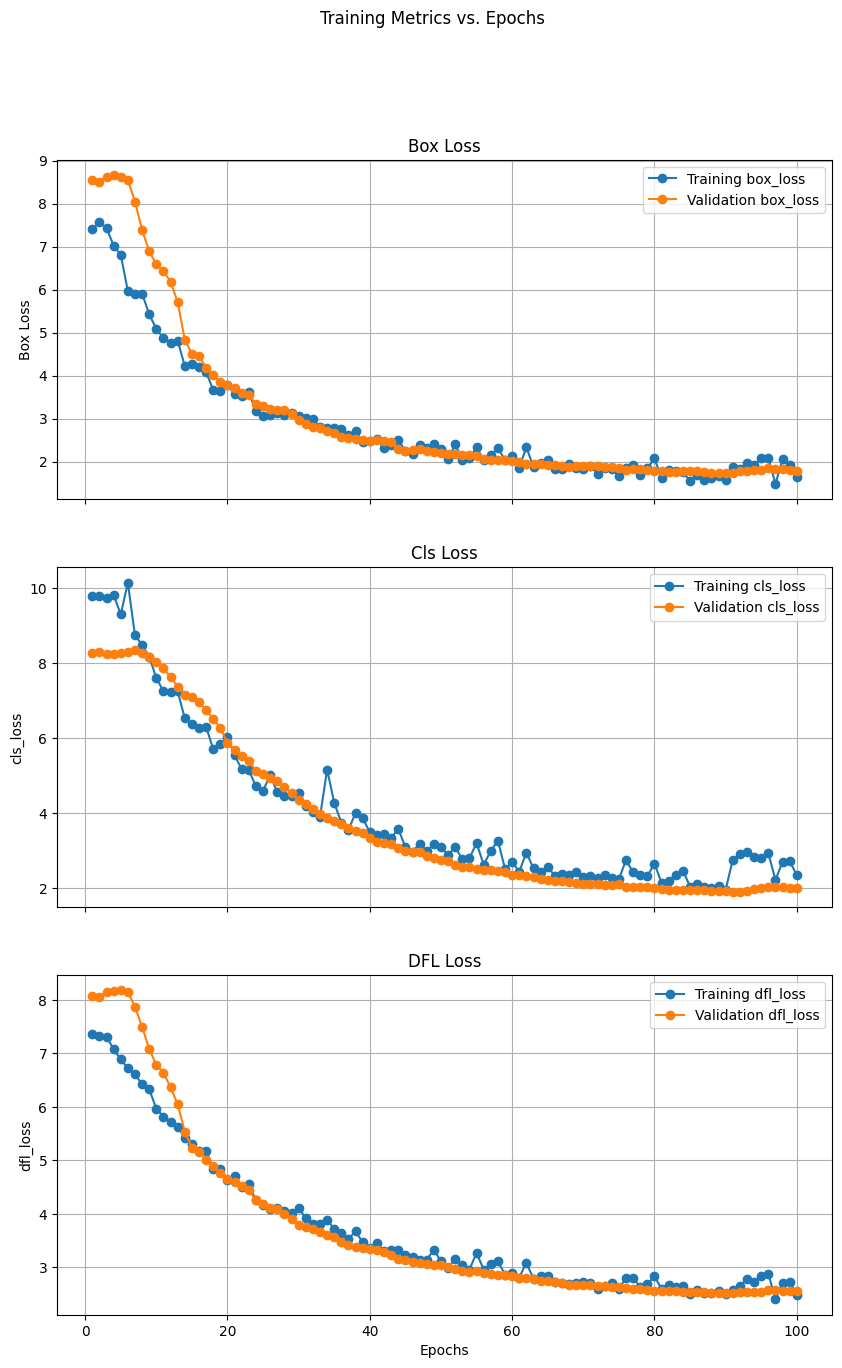

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

### Training and Validation box_loss
ax1.set_title('Box Loss')
ax1.plot(df['epoch'], df['train/box_loss'], label='Training box_loss', marker='o', linestyle='-')
ax1.plot(df['epoch'], df['val/box_loss'], label='Validation box_loss', marker='o', linestyle='-')
ax1.set_ylabel('Box Loss')
ax1.legend()
ax1.grid(True)

### Training and Validation cls_loss
ax2.set_title('Cls Loss')
ax2.plot(df['epoch'], df['train/cls_loss'], label='Training cls_loss', marker='o', linestyle='-')
ax2.plot(df['epoch'], df['val/cls_loss'], label='Validation cls_loss', marker='o', linestyle='-')
ax2.set_ylabel('cls_loss')
ax2.legend()
ax2.grid(True)

### Training and Validation dfl_loss
ax3.set_title('DFL Loss')
ax3.plot(df['epoch'], df['train/dfl_loss'], label='Training dfl_loss', marker='o', linestyle='-')
ax3.plot(df['epoch'], df['val/dfl_loss'], label='Validation dfl_loss', marker='o', linestyle='-')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('dfl_loss')
ax3.legend()
ax3.grid(True)

plt.suptitle('Training Metrics vs. Epochs')
plt.show()

# Validation results

In [88]:
validation_results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'val_batch' in i
]

len(validation_results_paths)

0

In [89]:
if len(validation_results_paths) >= 1:
    print(validation_results_paths[-1])

In [90]:
### check predictions or labels from a random validation batch
if len(validation_results_paths) >= 1:
    val_img_path = random.choice(validation_results_paths)
    print(val_img_path)
    display_image(val_img_path, print_info = False, hide_axis = True)

# Conclusions

- So now the model is trained and we have customized Yolo to detect PPE.
- In my [next notebook](https://www.kaggle.com/hinepo/yolov9-inference-for-red-zone-application) I will use this model to make inference on a video, and combine the PPE detection with a Red Zone application.
- **<font color='orange'>Upvote if you liked it!</font>**

In [98]:
!pwd

/content/train


In [97]:
!ls -slaht

total 196M
4.0K drwxr-xr-x 6 root root 4.0K Dec  3 08:04 .
143M -rw-r--r-- 1 root root 143M Dec  3 08:04 yolov10x_ppe_css_100_epochs.zip
 16K -rw-r--r-- 1 root root  13K Dec  3 08:03 training_log_df.csv
4.0K drwxr-xr-x 5 root root 4.0K Dec  3 07:38 dataset
5.4M -rw-r--r-- 1 root root 5.4M Dec  3 07:38 yolo11n.pt
4.0K drwxr-xr-x 4 root root 4.0K Dec  3 07:38 runs
 40M -rw-r--r-- 1 root root  40M Dec  3 07:35 yolov10b.pt
4.0K -rw-r--r-- 1 root root  194 Dec  3 07:35 data.yaml
4.0K drwxr-xr-x 2 root root 4.0K Dec  3 07:35 wandb
8.5M -rw------- 1 root root 8.5M Dec  3 07:34 BuildingCoverages.v8i.coco-segmentation.zip
4.0K drwxr-xr-x 2 root root 4.0K Dec  3 07:34 backup
4.0K drwxr-xr-x 1 root root 4.0K Dec  3 07:34 ..


In [95]:
!zip -r yolov10x_ppe_css_100_epochs.zip /content/train/runs/segment/yolov10b_ppe_css_100_epochs

  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/ (stored 0%)
  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/train_batch450.jpg (deflated 5%)
  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/args.yaml (deflated 53%)
  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/BoxPR_curve.png (deflated 11%)
  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/weights/ (stored 0%)
  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/weights/best.pt (deflated 8%)
  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/weights/best_openvino_model/ (stored 0%)
  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/weights/best_openvino_model/best.xml (deflated 94%)
  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/weights/best_openvino_model/best.bin (deflated 14%)
  adding: content/train/runs/segment/yolov10b_ppe_css_100_epochs/weights/best_openvino_model/metadata.yaml (deflated 

In [92]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch # Убедитесь, что torch установлен, если используете GPU

def plot_random_images_with_predictions(folder_path, model_path, num_images=20, seed=42, device='cpu', conf_threshold=0.5, iou_threshold=0.7):
    """
    Выбирает случайные изображения из папки, применяет модель YOLOv10 к каждому,
    отображает результаты предсказания (изображения с bounding boxes) и
    ВЫВОДИТ ИНФОРМАЦИЮ О БОКСАХ В КОНСОЛЬ.

    Args:
        folder_path (str): Путь к папке с изображениями.
        model_path (str): Путь к обученной модели YOLOv10 (.pt файл).
        num_images (int): Количество случайных изображений для выбора и отображения. Defaults to 20.
        seed (int): Значение для инициализации генератора случайных чисел. Defaults to 42.
        device (str): Устройство для инференса ('cpu' или 'cuda:0', 'cuda:1' и т.д.). Defaults to 'cpu'.
        conf_threshold (float): Порог уверенности для фильтрации детекций. Defaults to 0.5.
        iou_threshold (float): Порог IoU для NMS. Defaults to 0.7.
    """
    random.seed(seed)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp', '.tiff'))]

    # Ensure that we have at least num_images files to choose from
    if len(image_files) < num_images:
        raise ValueError(f"Not enough images in the folder. Found {len(image_files)}, need {num_images}.")

    # Randomly select num_images image files
    selected_files = random.sample(image_files, num_images)

    # Load the YOLOv10 model
    print(f"Loading model from {model_path}...")
    try:
        from ultralytics import YOLO
        model = YOLO(model_path)
        print(f"Model loaded successfully on {device}.")
    except ImportError:
        print("Error: ultralytics library not found. Please install it (e.g., pip install ultralytics).")
        return
    except Exception as e:
        print(f"Error loading model: {e}")
        return

    # Create a subplot grid
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

    # --- ОСНОВНОЙ ЦИКЛ: Правильное использование enumerate ---
    i=-1
    for file_name in selected_files: # <- Вот тут должно быть правильно
        i=i+1
        image_path = os.path.join(folder_path, file_name)

        try:
            # Run YOLOv10 prediction
            results = model.predict(
                source=image_path,
                conf=conf_threshold,
                iou=iou_threshold,
                imgsz=640, # Используйте размер, на котором обучалась модель, если не 640
                device=device,
                verbose=False
            )

            # The result object for the first (and only) image in the batch
            result = results[0] # results - это список, берем первый элемент

            # --- НОВОЕ: Вывод информации о боксах ---
            print(f"\n--- Обнаружения для изображения: {file_name} ---")
            if result.boxes is not None and len(result.boxes) > 0:
                boxes = result.boxes.xyxy.cpu().numpy() # [x1, y1, x2, y2]
                confs = result.boxes.conf.cpu().numpy() # Уверенность
                cls_ids = result.boxes.cls.cpu().numpy().astype(int) # ID класса
                names = result.names # Словарь id -> name
                j = -1
                for (box, conf, cls_id) in zip(boxes, confs, cls_ids):
                    j= j + 1
                    x1, y1, x2, y2 = box
                    class_name = names[cls_id]
                    print(f"  Объект {j+1}: Класс='{class_name}', Уверенность={conf:.3f}, BBox=[{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")

                # Подсчет количества по классам
                unique_cls_ids, counts = np.unique(cls_ids, return_counts=True)
                print("  Статистика по классам:")
                for cls_id, count in zip(unique_cls_ids, counts):
                    class_name = names[cls_id]
                    print(f"    - '{class_name}': {count} объектов")
            else:
                print("  Объекты не обнаружены.")
            # --- КОНЕЦ НОВОГО ---

            # Get the image with predictions plotted (this is a BGR numpy array from OpenCV)
            plotted_img_bgr = result.plot()

            # Convert BGR (OpenCV) to RGB for matplotlib
            plotted_img_rgb = plotted_img_bgr[..., ::-1] # Reverse the last axis (BGR to RGB)

            # Select the correct axis
            if num_rows == 1:
                ax = axes[i % num_cols]
            else:
                ax = axes[i // num_cols, i % num_cols]

            # Display the image with predictions
            ax.imshow(plotted_img_rgb)
            ax.axis('off') # Turn off axis
            ax.set_title(file_name, fontsize=8) # Smaller font for titles

        except Exception as e:
            print(f"Error processing image {file_name}: {e}")
            # Handle error: could show an error message on the subplot or skip
            if num_rows == 1:
                ax = axes[i % num_cols]
            else:
                ax = axes[i // num_cols, i % num_cols]
            ax.text(0.5, 0.5, f'Error: {str(e)[:20]}...', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')
            ax.axis('off')
            ax.set_title(file_name, fontsize=8, color='red')


    # Remove empty subplots if any
    total_subplots = num_rows * num_cols
    if num_images < total_subplots:
        for i in range(num_images, total_subplots):
            if num_rows == 1:
                fig.delaxes(axes[i])
            else:
                row_idx = i // num_cols
                col_idx = i % num_cols
                fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()
    plt.show()

# --- Пример использования ---
# model_path = '/content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt' # ЗАМЕНИТЕ НА СВОЙ ПУТЬ К МОДЕЛИ
# folder_path = CFG.CUSTOM_DATASET_DIR + 'val/' # Или 'train/', или любой другой путь с изображениями # ЗАМЕНИТЕ НА СВОЙ ПУТЬ К ПАПКЕ С ИЗОБРАЖЕНИЯМИ

# # Вызов функции
# plot_random_images_with_predictions(
#     folder_path=folder_path,
#     model_path=model_path,
#     num_images=15, # Выберите, сколько изображений отобразить
#     seed=42,       # Для воспроизводимости
#     device='cpu',  # Используйте 'cuda:0' если доступен GPU и вы хотите его использовать
#     conf_threshold=0.3 # Порог уверенности, при необходимости
# )

# --- Пример использования ---
# Укажите правильные пути
model_path = '/content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt' # ЗАМЕНИТЕ НА СВОЙ ПУТЬ К МОДЕЛИ
# folder_path = CFG.CUSTOM_DATASET_DIR + 'val/' # Или 'train/', или любой другой путь с изображениями # ЗАМЕНИТЕ НА СВОЙ ПУТЬ К ПАПКЕ С ИЗОБРАЖЕНИЯМИ
folder_path = CFG.CUSTOM_DATASET_DIR + 'train/'


plot_random_images_with_predictions(
    folder_path=folder_path,
    model_path=model_path,
    num_images=3, # Выберите, сколько изображений отобразить
    seed=42,       # Для воспроизводимости
    device='cpu',  # Используйте 'cuda:0' если доступен GPU и вы хотите его использовать
    conf_threshold=0.3 # Порог уверенности, при необходимости
)

Loading model from /content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt...
Error loading model: [Errno 2] No such file or directory: '/content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt'


In [93]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch # Убедитесь, что torch установлен, если используете GPU

def plot_random_images_with_predictions_and_masks(folder_path, model_path, num_images=20, seed=42, device='cpu', conf_threshold=0.5, iou_threshold=0.7):
    """
    Выбирает случайные изображения из папки, применяет модель YOLOv10 к каждому,
    отображает результаты предсказания (изображения с bounding boxes и масками) и
    ВЫВОДИТ ИНФОРМАЦИЮ О БОКСАХ И МАСКАХ В КОНСОЛЬ.

    Args:
        folder_path (str): Путь к папке с изображениями.
        model_path (str): Путь к обученной модели YOLOv10 (.pt файл).
        num_images (int): Количество случайных изображений для выбора и отображения. Defaults to 20.
        seed (int): Значение для инициализации генератора случайных чисел. Defaults to 42.
        device (str): Устройство для инференса ('cpu' или 'cuda:0', 'cuda:1' и т.д.). Defaults to 'cpu'.
        conf_threshold (float): Порог уверенности для фильтрации детекций. Defaults to 0.5.
        iou_threshold (float): Порог IoU для NMS. Defaults to 0.7.
    """
    random.seed(seed)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp', '.tiff'))]

    # Ensure that we have at least num_images files to choose from
    if len(image_files) < num_images:
        raise ValueError(f"Not enough images in the folder. Found {len(image_files)}, need {num_images}.")

    # Randomly select num_images image files
    selected_files = random.sample(image_files, num_images)

    # Load the YOLOv10 model
    print(f"Loading model from {model_path}...")
    try:
        from ultralytics import YOLO
        model = YOLO(model_path)
        print(f"Model loaded successfully on {device}.")
    except ImportError:
        print("Error: ultralytics library not found. Please install it (e.g., pip install ultralytics).")
        return
    except Exception as e:
        print(f"Error loading model: {e}")
        return

    # Create a subplot grid
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

    # --- ОСНОВНОЙ ЦИКЛ: Правильное использование enumerate ---
    i = -1
    for file_name in selected_files: # <- Вот тут должно быть правильно
        i = i + 1
        image_path = os.path.join(folder_path, file_name)

        try:
            # Run YOLOv10 prediction
            results = model.predict(
                source=image_path,
                conf=conf_threshold,
                iou=iou_threshold,
                imgsz=640, # Используйте размер, на котором обучалась модель, если не 640
                device=device,
                verbose=False
            )

            # The result object for the first (and only) image in the batch
            result = results[0] # results - это список, берем первый элемент

            # --- НОВОЕ: Вывод информации о боксах и масках ---
            print(f"\n--- Обнаружения для изображения: {file_name} ---")
            has_detections = False
            if result.boxes is not None and len(result.boxes) > 0:
                print(f"\n !!!!!!!!result.boxes!!!!!!-",result.boxes)
                has_detections = True
                boxes = result.boxes.xyxy.cpu().numpy() # [x1, y1, x2, y2]
                confs = result.boxes.conf.cpu().numpy() # Уверенность
                cls_ids = result.boxes.cls.cpu().numpy().astype(int) # ID класса
                names = result.names # Словарь id -> name
                j = -1
                for (box, conf, cls_id) in zip(boxes, confs, cls_ids):
                    print(f"\n !!!!!!!!!--box!!!!!!-", box)
                    j= j + 1
                    x1, y1, x2, y2 = box
                    class_name = names[cls_id]
                    print(f"  Объект {j+1}: Класс='{class_name}', Уверенность={conf:.3f}, BBox=[{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")

                # Подсчет количества по классам
                unique_cls_ids, counts = np.unique(cls_ids, return_counts=True)
                print("  Статистика по классам:")
                for cls_id, count in zip(unique_cls_ids, counts):
                    class_name = names[cls_id]
                    print(f"    - '{class_name}': {count} объектов")
            else:
                print("  Объекты не обнаружены.")

            # --- ПРОВЕРКА И ВЫВОД МАСОК ---
            if result.masks is not None and len(result.masks) > 0:
                print("  --- Найдены маски сегментации ---")
                # result.masks.data - это тензор [N, H, W] где N - количество масок, H, W - размеры маски (обычно совпадают с размером входного изображения)
                mask_data = result.masks.data.cpu().numpy() # [N, H, W]
                mask_cls_ids = result.masks.cls.cpu().numpy().astype(int) # ID классов для масок (должно совпадать с result.boxes.cls)
                mask_confs = result.masks.conf.cpu().numpy() if result.masks.conf is not None else [None]*len(mask_data) # Уверенности для масок (если есть)

                for k, (mask, mask_cls_id, mask_conf) in enumerate(zip(mask_data, mask_cls_ids, mask_confs)):
                    class_name = names[mask_cls_id]
                    conf_str = f", Уверенность={mask_conf:.3f}" if mask_conf is not None else ""
                    print(f"    Маска {k+1}: Класс='{class_name}'{conf_str}, Форма маски={mask.shape}")

                    # --- ВАЖНО: Как получить "многогранник" ---
                    # Маска `mask` - это бинарное изображение (0 или 1).
                    # Чтобы получить "многогранник" (полигон), нужно использовать алгоритмы контурного анализа.
                    # OpenCV предоставляет `cv2.findContours` для этой цели.
                    import cv2
                    # findContours работает с 8-bit single-channel images
                    # Преобразуем маску в uint8 (0 или 255)
                    mask_uint8 = (mask * 255).astype(np.uint8)
                    # Находим контуры
                    # mode: CV_RETR_EXTERNAL - извлекает внешние контуры
                    # method: CV_CHAIN_APPROX_SIMPLE - сжимает горизонтальные, вертикальные и диагональные сегменты, оставляя только концевые точки
                    contours, hierarchy = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                    if len(contours) > 0:
                        # Обычно один объект -> один основной контур, берем первый
                        largest_contour = max(contours, key=cv2.contourArea)
                        # largest_contour - это массив точек [[x1, y1], [x2, y2], ...]
                        # Это и есть "многогранник" (полигон), описывающий сегментированную область.
                        polygon_points = largest_contour.squeeze() # Убираем лишнюю размерность, если она есть ([N, 1, 2] -> [N, 2])
                        if polygon_points.ndim == 1:
                             # Если осталась только одна точка, это вырожденный случай
                             polygon_points = [polygon_points]
                        print(f"      Многогранник (полигон) для маски {k+1}: {len(polygon_points)} точек.")
                        # print(f"      Пример первых 5 точек полигона: {polygon_points[:5]}") # Вывести немного точек для проверки
                        # Точка - это массив [x, y]
                        # polygon_points.tolist() - если нужно получить список списков [[x,y], [x,y], ...]
                        # polygon_points - numpy array формы (N, 2)
                    else:
                         print(f"      Маска {k+1}: Не найдено контуров (возможно, маска пуста или объект слишком мал).")

            else:
                print("  Маски сегментации не обнаружены (модель может быть обучена только на детекцию).")

            # --- КОНЕЦ НОВОГО ---

            # Get the image with predictions plotted (this is a BGR numpy array from OpenCV)
            # This includes both boxes and masks if the model supports segmentation
            plotted_img_bgr = result.plot()

            # Convert BGR (OpenCV) to RGB for matplotlib
            plotted_img_rgb = plotted_img_bgr[..., ::-1] # Reverse the last axis (BGR to RGB)

            # Select the correct axis
            if num_rows == 1:
                ax = axes[i % num_cols]
            else:
                ax = axes[i // num_cols, i % num_cols]

            # Display the image with predictions (boxes and masks)
            ax.imshow(plotted_img_rgb)
            ax.axis('off') # Turn off axis
            ax.set_title(file_name, fontsize=8) # Smaller font for titles

        except Exception as e:
            print(f"Error processing image {file_name}: {e}")
            # Handle error: could show an error message on the subplot or skip
            if num_rows == 1:
                ax = axes[i % num_cols]
            else:
                ax = axes[i // num_cols, i % num_cols]
            ax.text(0.5, 0.5, f'Error: {str(e)[:20]}...', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')
            ax.axis('off')
            ax.set_title(file_name, fontsize=8, color='red')


    # Remove empty subplots if any
    total_subplots = num_rows * num_cols
    if num_images < total_subplots:
        for i in range(num_images, total_subplots):
            if num_rows == 1:
                fig.delaxes(axes[i])
            else:
                row_idx = i // num_cols
                col_idx = i % num_cols
                fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()
    plt.show()

# --- Пример использования ---
# model_path = '/content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt' # ЗАМЕНИТЕ НА СВОЙ ПУТЬ К МОДЕЛИ
# folder_path = CFG.CUSTOM_DATASET_DIR + 'val/' # Или 'train/', или любой другой путь с изображениями # ЗАМЕНИТЕ НА СВОЙ ПУТЬ К ПАПКЕ С ИЗОБРАЖЕНИЯМИ
# folder_path = CFG.CUSTOM_DATASET_DIR + 'train/'

model_path = '/content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt' # ЗАМЕНИТЕ НА СВОЙ ПУТЬ К МОДЕЛИ
# folder_path = CFG.CUSTOM_DATASET_DIR + 'val/' # Или 'train/', или любой другой путь с изображениями # ЗАМЕНИТЕ НА СВОЙ ПУТЬ К ПАПКЕ С ИЗОБРАЖЕНИЯМИ
folder_path = CFG.CUSTOM_DATASET_DIR + 'train/'

plot_random_images_with_predictions_and_masks(
    folder_path=folder_path,
    model_path=model_path,
    num_images=3, # Выберите, сколько изображений отобразить
    seed=42,       # Для воспроизводимости
    device='cpu',  # Используйте 'cuda:0' если доступен GPU и вы хотите его использовать
    conf_threshold=0.3 # Порог уверенности, при необходимости
)

plot_random_images_with_predictions_and_masks(
    folder_path=folder_path,
    model_path=model_path,
    num_images=3, # Выберите, сколько изображений отобразить
    seed=42,       # Для воспроизводимости
    device='cpu',  # Используйте 'cuda:0' если доступен GPU и вы хотите его использовать
    conf_threshold=0.3 # Порог уверенности, при необходимости
)




# plot_random_images_with_predictions(
#     folder_path=folder_path,
#     model_path=model_path,
#     num_images=3, # Выберите, сколько изображений отобразить
#     seed=42,       # Для воспроизводимости
#     device='cpu',  # Используйте 'cuda:0' если доступен GPU и вы хотите его использовать
#     conf_threshold=0.3 # Порог уверенности, при необходимости
# )

Loading model from /content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt...
Error loading model: [Errno 2] No such file or directory: '/content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt'
Loading model from /content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt...
Error loading model: [Errno 2] No such file or directory: '/content/train/runs/detect/yolov10b_ppe_css_100_epochs/weights/best.pt'


In [127]:
!pwd

/content/train
